<a href="https://colab.research.google.com/github/bforoura/AI/blob/main/Module6/Iris_MLP_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Training a Multilayer Perceptron on Iris Dataset**

* A multilayer perceptron (MLP) is one of most common artificial neural networks (ANNs)

* It consists of a layered, feedforward, completely connected network of artificial neurons (nodes)

* An example of a small network:


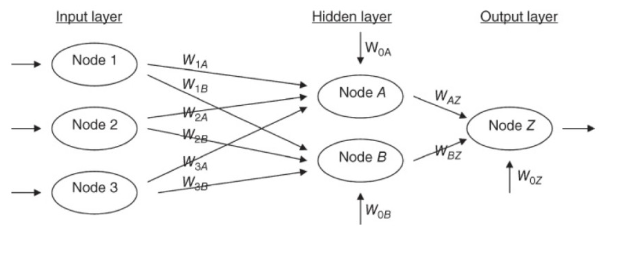

# **MLP Hyperparameters**

* Number of hidden layers
* Number of neurons in each hidden layer

* In **sklearn.neural_network.MLPClassifier**
> * hidden_layer_sizes = (9): one hidden layer with 9 neurons
> * hidden_layer_sizes = (9, 9, 9): three hidden layers with 9, 9 and 9 neurons respectively
> * default (100,): one hidden layer with 100 neurons

* One hidden layer MLP and Three layer MLP:

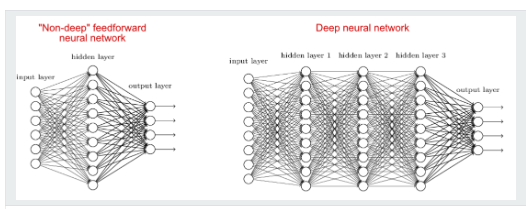

# **Train, Test, and Validation Split**

* When working with data science and machine learning, it’s crucial to have a clear understanding of how to split your data into different sets for training, testing, and validation purposes.


* When you are training a machine learning model, you need to split your data into three sets: the **training** set, the **test** set, and the **validation** set. The train set is used to train the model, the test set is used to evaluate the model, and the validation set is used to **tune the hyperparameters** of the model.

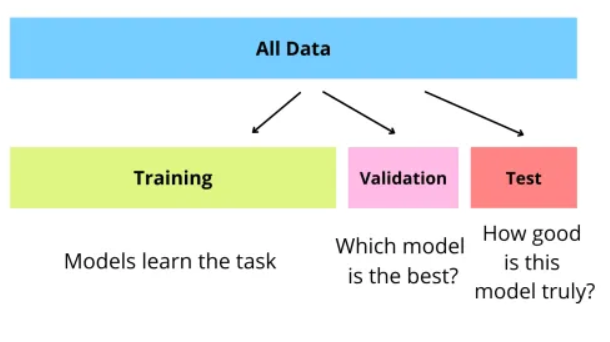


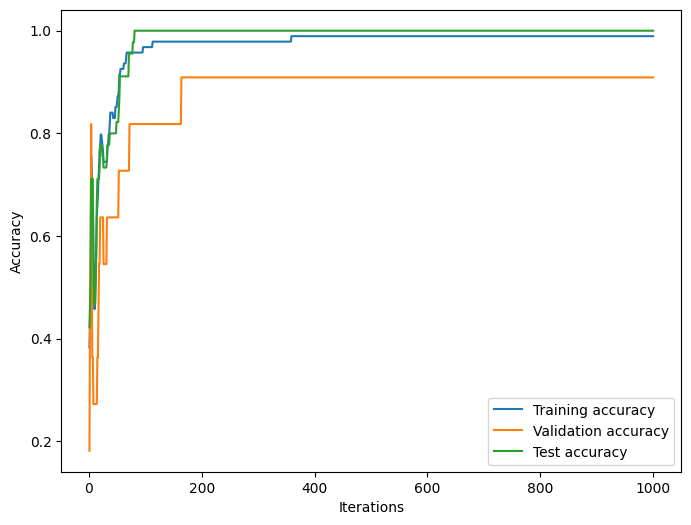

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training, validation, and testing sets -- randomly shuffle the sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

#  Split the training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Create an MLPClassifier without early stopping
mlp = MLPClassifier(hidden_layer_sizes=(40,50), max_iter=1000)

# Initialize lists to store training, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Train the classifier and calculate accuracies at each iteration
# partial_fit() allows for incremental learning without retraining it from scratch
for i in range(1000):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train, y_train))
    val_accuracies.append(mlp.score(X_val, y_val))
    test_accuracies.append(mlp.score(X_test, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **The Loss Curve**

* Also known as the error curve, shows how the loss function value changes over iterations during the training of a machine learning model.
* The loss function measures the difference between the **predicted values** of the model and the **actual values** in the training dataset.

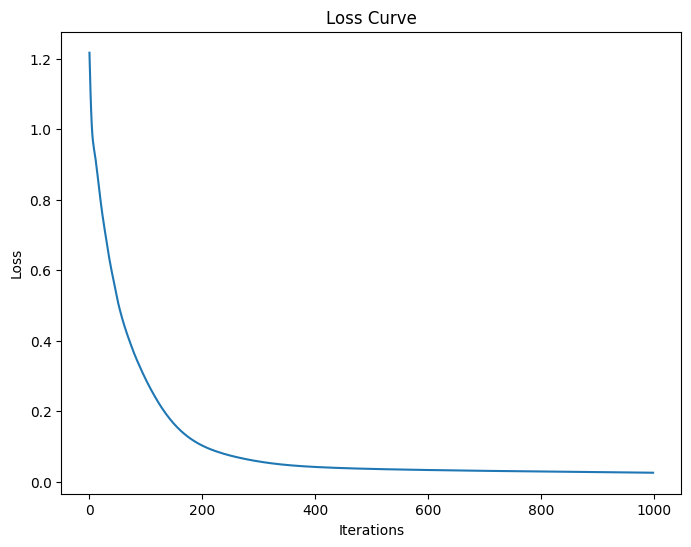

In [33]:
#@title Display the loss curve of the model

plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [29]:
#@title Information about the weights and biases of the trained model

for i, coef in enumerate(mlp.coefs_):
    print(f"Layer {i} - Weight matrix shape: {coef.shape}")

print()

for i, intercept in enumerate(mlp.intercepts_):
    print(f"Layer {i} - Intercept vector shape: {intercept.shape}")

Layer 0 - Weight matrix shape: (4, 40)
Layer 1 - Weight matrix shape: (40, 50)
Layer 2 - Weight matrix shape: (50, 3)

Layer 0 - Intercept vector shape: (40,)
Layer 1 - Intercept vector shape: (50,)
Layer 2 - Intercept vector shape: (3,)


In [30]:
#@title Calculate the overall training and test accuracies
train_accuracy = mlp.score(X_train, y_train)
test_accuracy = mlp.score(X_test, y_test)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

Overall Training Accuracy: 0.9893617021276596
Overall Test Accuracy: 1.0


# **The Confusion Matrix**

* A table that is often used to describe the performance of a classification model on a set of data for which the true values are known.

* It allows the visualization of the performance of an algorithm by showing the number of correct and incorrect classifications, as well as the types of errors made by the classifier.

* In a binary classification problem, the confusion matrix is a 2x2 matrix with four entries:

>* **True Positive** (TP): The number of observations that were correctly predicted as positive.
>* **False Positiv**e (FP): The number of observations that were incorrectly predicted as positive (actually negative).
>* **True Negative** (TN): The number of observations that were correctly predicted as negative.
>* **False Negative** (FN): The number of observations that were incorrectly predicted as negative (actually positive).

* The confusion matrix for a multi-class classification problem is a square matrix where the rows represent the actual classes and the columns represent the predicted classes. Each entry in the matrix represents the number of observations that belong to the corresponding actual class and predicted class.

* The confusion matrix is a useful tool for evaluating the performance of a classification model, as it provides insights into the types of errors the model is making and can help identify areas for improvement.

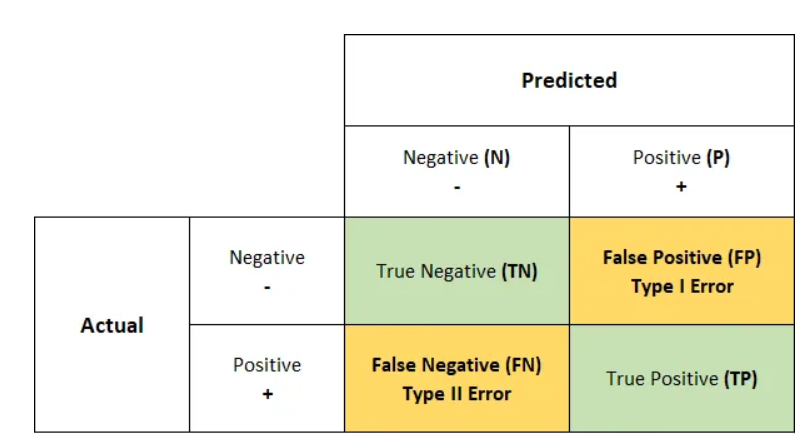

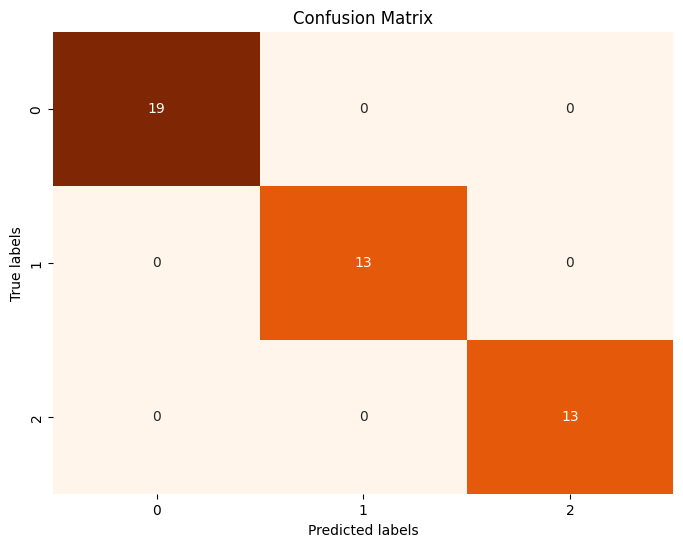

In [31]:
#@title Display the confusion matrix for the test set
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted labels for the test set
y_pred = mlp.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
